# Scuderia Ferrari

![Scuderia Ferrari](http://wallpapercave.com/wp/wp1880037.jpg)

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

import sqlite3
from sqlite3 import Error

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def insert_sql_statement(insert_data, conn, table_name):
    with conn:
        cur = conn.cursor()

        empty_value_container = "?,"*len(insert_data[0])
        empty_value_container = "".join(["(",empty_value_container.strip(","),")"])

        cur.executemany(f"INSERT INTO {table_name} VALUES {empty_value_container}", insert_data)
        
def read_sql_query(query, conn):
    result = pd.read_sql_query(query, conn)
    return result

In [3]:
database_filename = 'f1_info.db'
conn = create_connection(database_filename, delete_db=True)

In [4]:
def create_constructors_table():

    with open("constructors.csv","r") as f:
        data = f.read().strip().split("\n")

    data = list(map(lambda row: row.split(","), data))

    columns = data[0]

    constructor_index = columns.index("constructorId")
    name_index = columns.index("name")

    constructorId = list(map(lambda row: int(row[constructor_index]), data[1:]))
    name = list(map(lambda row: row[name_index].strip('"'), data[1:]))

    insert_data = list(zip(constructorId,name))
    
    sql_create_statement = """CREATE TABLE constructors
                        (
                            constructorId Integer not null Primary key,
                            name Text not null
                        )
                        """

    create_table(conn, sql_create_statement,drop_table_name=True)

    insert_sql_statement(insert_data, conn, "constructors")
    
def create_constructor_standings_table():

    with open("constructor_standings.csv","r") as f:
        data = f.read().strip().split("\n")

    data = list(map(lambda row: row.split(","), data))

    columns = data[0]

    constructorStandingsId_index = columns.index("constructorStandingsId")
    raceId_index = columns.index("raceId")
    constructorId_index = columns.index("constructorId")
    points_index = columns.index("points")
    position_index = columns.index("position")

    constructorStandingsId = list(map(lambda row: int(row[constructorStandingsId_index]), data[1:]))
    raceId = list(map(lambda row: int(row[raceId_index]), data[1:]))
    constructorId = list(map(lambda row: int(row[constructorId_index]), data[1:]))
    points = list(map(lambda row: float(row[points_index]), data[1:]))
    position = list(map(lambda row: int(row[position_index]), data[1:]))

    insert_data = list(zip(constructorStandingsId, raceId, constructorId, points, position))

    sql_create_statement = """CREATE TABLE constructor_standings
                        (
                            constructorStandingsId Integer not null Primary key,
                            raceId Integer not null,
                            constructorId not null,
                            points Integer not null,
                            position Integer not null
                        )
                        """

    create_table(conn, sql_create_statement,drop_table_name=True)

    insert_sql_statement(insert_data, conn, "constructor_standings")
    
def create_drivers_table():

    with open("drivers.csv","r") as f:
        data = f.read().strip().split("\n")

    data = list(map(lambda row: row.split(","), data))

    columns = data[0]

    driverId_index = columns.index("driverId")
    forename_index = columns.index("forename")
    surname_index = columns.index("surname")

    driverId = list(map(lambda row: int(row[driverId_index]), data[1:]))
    name = list(map(lambda row: " ".join([row[forename_index].strip('"'),row[surname_index].strip('"')]) , data[1:]))

    insert_data = list(zip(driverId, name))

    sql_create_statement = """CREATE TABLE drivers
                        (
                            driverId Integer not null Primary key,
                            name Text not null
                        )
                        """

    create_table(conn, sql_create_statement,drop_table_name=True)

    insert_sql_statement(insert_data, conn, "drivers")
    
def create_races_table():

    with open("races.csv","r") as f:
        data = f.read().strip().split("\n")

    data = list(map(lambda row: row.split(","), data))

    columns = data[0]

    raceId_index = columns.index("raceId")
    year_index = columns.index("year")
    round_index = columns.index("round")

    raceId = list(map(lambda row: int(row[raceId_index]), data[1:]))
    year = list(map(lambda row: int(row[year_index]), data[1:]))
    round = list(map(lambda row: int(row[round_index]), data[1:]))

    insert_data = list(zip(raceId, year, round))

    sql_create_statement = """CREATE TABLE races
                        (
                            raceId Integer not null Primary key,
                            year Integer not null,
                            round Integer not null
                        )
                        """

    create_table(conn, sql_create_statement, drop_table_name=True)

    insert_sql_statement(insert_data, conn, "races")
    
def create_results_table():

    with open("results.csv","r") as f:
        data = f.read().strip().split("\n")

    data = list(map(lambda row: row.split(","), data))

    columns = data[0]

    resultId_index = columns.index("resultId")
    raceId_index = columns.index("raceId")
    driverId_index = columns.index("driverId")
    constructorId_index = columns.index("constructorId")
    grid_index = columns.index("grid")
    position_index = columns.index("position")
    points_index = columns.index("points")
    statusId_index = columns.index("statusId")

    resultId = list(map(lambda row: int(row[resultId_index]), data[1:]))
    raceId = list(map(lambda row: int(row[raceId_index]), data[1:]))
    driverId = list(map(lambda row: int(row[driverId_index]), data[1:]))
    constructorId = list(map(lambda row: int(row[constructorId_index]), data[1:]))
    grid = list(map(lambda row: int(row[grid_index]), data[1:]))
    position = list(map(lambda row: row[position_index], data[1:]))
    points = list(map(lambda row: float(row[points_index]), data[1:]))
    statusId = list(map(lambda row: int(row[statusId_index]), data[1:]))

    position = list(map(lambda val: '1000' if val=="\\N" else val, position))
    position = list(map(lambda val: int(val), position))

    insert_data = list(zip(resultId, raceId, driverId, constructorId, grid, position, points, statusId))

    result_df = pd.DataFrame(insert_data, columns=["resultId","raceId","driverId","constructorId","grid","position","points","statusId"])

    grouped=result_df.groupby(by='raceId')['position']
    values=grouped.transform(lambda x: len(x))
    indices_to_replace=result_df[result_df.position==1000].index.tolist()
    values_to_replace=values[indices_to_replace]
    result_df['position'].iloc[indices_to_replace]=values_to_replace

    insert_data = result_df.values

    sql_create_statement = """CREATE TABLE results
                        (
                            resultId Integer not null Primary key,
                            raceId Integer not null,
                            driverId Integer not null,
                            constructorId Integer not null,
                            grid Integer not null,
                            position Integer not null,
                            points Real not null,
                            statusId Integer not null
                        )
                        """

    create_table(conn, sql_create_statement, drop_table_name=True)

    insert_sql_statement(insert_data, conn, "results")
    
def create_status_table():

    with open("status.csv","r") as f:
        data = f.read().strip().split("\n")

    data = list(map(lambda row: row.split(","), data))

    columns = data[0]

    statusId_index = columns.index("statusId")
    status_index = columns.index("status")

    statusId = list(map(lambda row: int(row[statusId_index]), data[1:]))
    status = list(map(lambda row: row[status_index].strip('"'), data[1:]))

    insert_data = list(zip(statusId, status))

    sql_create_statement = """CREATE TABLE status
                        (
                            statusId Integer not null Primary key,
                            status Text not null
                        )
                        """

    create_table(conn, sql_create_statement, drop_table_name=True)

    insert_sql_statement(insert_data, conn, "status")

In [5]:
create_constructors_table()
create_constructor_standings_table()
create_drivers_table()
create_races_table()
create_results_table()
create_status_table()

Import neccessary libraries

In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import sqlite3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [7]:
def read_sql_query(query, conn):
    result = pd.read_sql_query(query, conn)
    return result

Let's first see why Ferrari is one of the most popular Formula One teams.

In [8]:
query_statement = """
                select year, constructors.name from constructor_standings
                
                    join

                        (
                        
                            select year, raceId from races
                            group by year
                            having max(round)
                        
                        ) as last_race

                            on last_race.raceId = constructor_standings.raceId
                        
                    join constructors
                        on constructor_standings.constructorId=constructors.constructorId
                
                where position=1
                
                order by year
            """
result = read_sql_query(query_statement, conn)

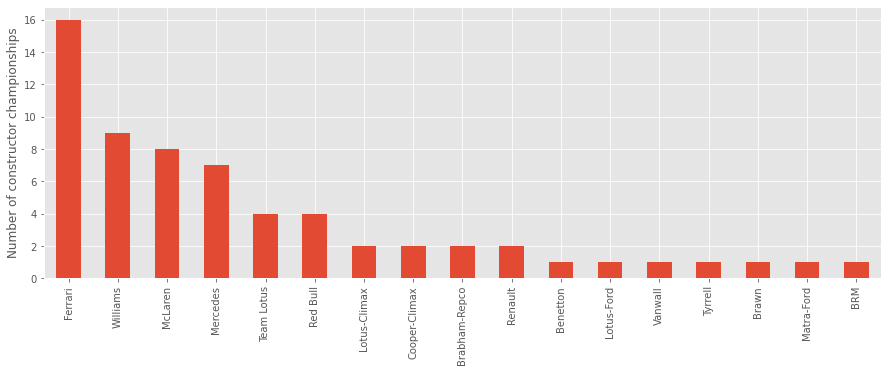

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
result.name.value_counts().plot.bar(ax=ax)
ax.set_ylabel("Number of constructor championships");

<ul>
    <li>Ferrari is the by far the most successful team in the history of F1, in terms of the constructor championship wins.</li>
</ul>
Let's see the list of last decade's constructor championship winners.

In [10]:
result[(result.year>=2010) & (result.year<2020)]

,year,name
52,2010,Red Bull
53,2011,Red Bull
54,2012,Red Bull
55,2013,Red Bull
56,2014,Mercedes
57,2015,Mercedes
58,2016,Mercedes
59,2017,Mercedes
60,2018,Mercedes
61,2019,Mercedes







<ul>
    <li>In the entire last decade, Ferrari has not won a single championship.</li>
</ul>
Is Ferrari performing really bad? Let's find out Ferrari's championship standings at the end of each season for the last decade.

In [11]:
query_statement = """
                select last_race.year, constructors.name, position from constructor_standings
                
                    join

                        (
                        
                            select year, raceId from races
                            where year between 2010 and 2019
                            group by year
                            having max(round)
                        
                        ) as last_race

                            on constructor_standings.raceId = last_race.raceId
                    
                    join constructors
                        on constructors.constructorId = constructor_standings.constructorId
                
                where constructors.name = "Ferrari"
                
                order by last_race.year
            """
result = read_sql_query(query_statement, conn)

In [12]:
result

,year,name,position
0,2010,Ferrari,3
1,2011,Ferrari,3
2,2012,Ferrari,2
3,2013,Ferrari,3
4,2014,Ferrari,4
5,2015,Ferrari,2
6,2016,Ferrari,3
7,2017,Ferrari,2
8,2018,Ferrari,2
9,2019,Ferrari,2


<ul>
    <li>In terms of championship position Ferrari's performance is not that bad.</li>
    <li>It has dropped to hit the low point in 2014 but it has been consistent overall to achieve the 2nd or 3rd spots.</li>
</ul>

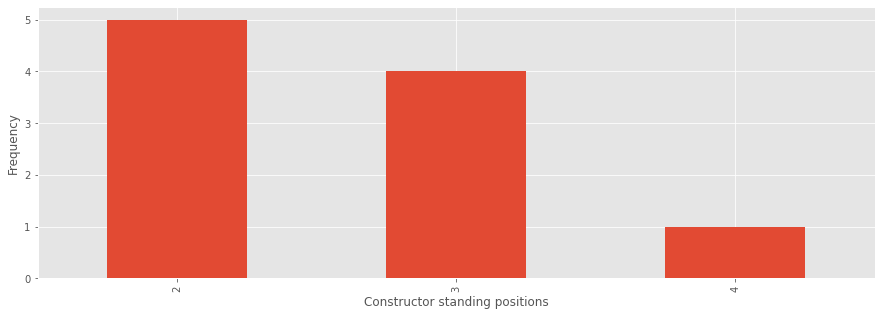

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
result.position.value_counts().plot.bar(ax=ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("Constructor standing positions");

<ul>
    <li>In particular, we can see that Ferrari has not been in very bad shape. In fact, we can say that Ferrari has failed to win five times in the last decade by being season runner-ups.</li>
</ul>
But, the constructor standings does not tell the entire story. Hence, let's observe Ferrari's performances in terms of it's percentage point-gaps deficits to win the championships.
<br><br>
percentage points deficit = $\frac{\text{Total points scored by championship winning team of the years - Ferrari's total points in the same year}}{\text{Total points scored by championship winning team of the years}}$

In [14]:
query_statement = """
                select last_race.year, constructors.name, constructor_standings.position, constructor_standings.points from constructor_standings
                
                    join

                        (
                        
                            select year, raceId from races
                            where year between 2010 and 2019
                            group by year
                            having max(round)
                        
                        ) as last_race

                            on last_race.raceId = constructor_standings.raceId
                        
                    join constructors
                        on constructors.constructorId = constructor_standings.constructorId
                
                where constructors.name = "Ferrari" or constructor_standings.position = 1
                
                order by year, position
            """
result = read_sql_query(query_statement, conn)

In [15]:
# Calculate Ferrari's percentage deficit over the decade
percent_deficit = []
years = result.year.unique()
for year in years:
    percent_deficit.append(-1*(result[result.year==year].points.pct_change().iloc[1]))
    

# Calculate moving average
numbers = percent_deficit.copy()
window_size = 3
i = 0
moving_averages = []

while i < len(numbers) - window_size + 1:
    this_window = numbers[i : i + window_size]
    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 1

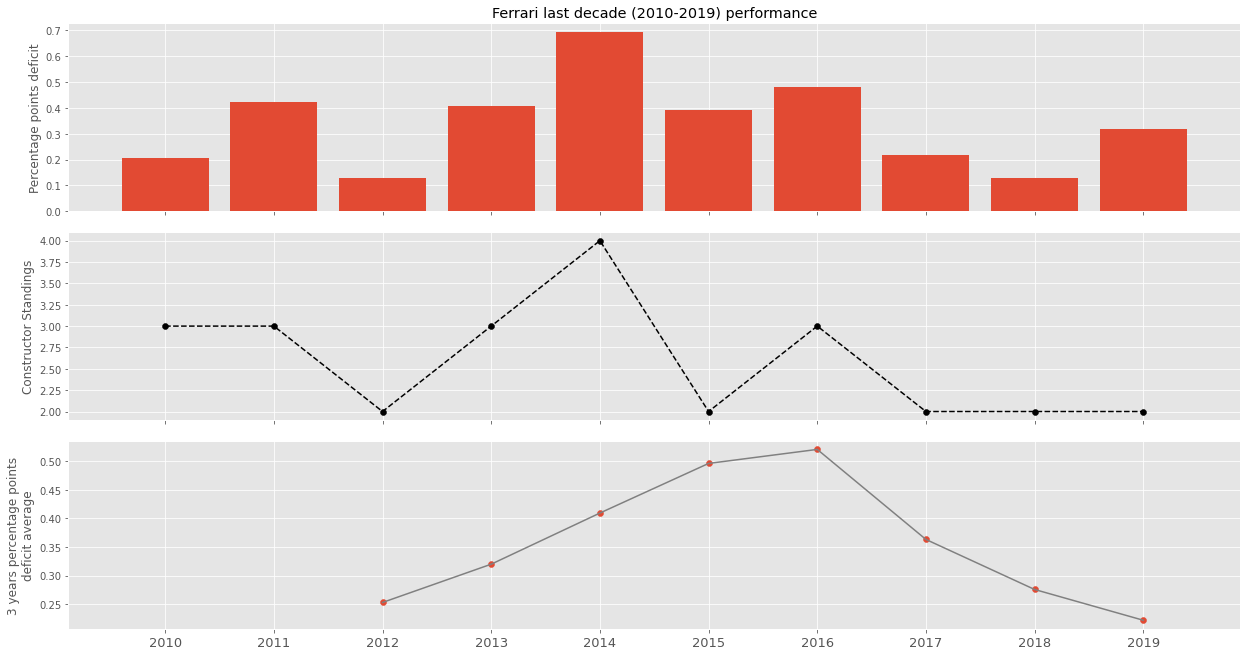

In [16]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(17,9), sharex=True)
fig.tight_layout()

ax1.bar(years, percent_deficit)

ax2.scatter(years, result[result.name=="Ferrari"].position.values, c="black")
ax2.plot(years, result[result.name=="Ferrari"].position.values, c="black", linestyle="--")

ax3.scatter(years[2:], moving_averages)
ax3.plot(years[2:], moving_averages, c="gray", label="3-years moving average")

ax1.set_ylabel("Percentage points deficit")
ax2.set_ylabel("Constructor Standings")
ax3.set_ylabel("3 years percentage points\ndeficit average")

ax1.set_title("Ferrari last decade (2010-2019) performance")
ax3.set_xticks(years)
ax3.set_xticklabels(years, fontsize=13);

<ul>
    <li>Considering only the championship standings can be missleading. For example, in the years 2010 and 2011, Ferrari's percentage points deficit increased from just above 20% to just above 40% but the constructor standings remained the same.</li>
    <li>In the year 2012, percentage points deficit was one of the lowest of the decade followed by the increase in the deficit for coming years reaching to the maximum, almost 70% in year 2014.</li>
    <li>The gradual improvement in the performance after 2014 helped Ferrari to reach one of the lowest percentage points deficit of the decade, in 2018.</li>
</ul>

From above plots we can infer that reasons behind Ferrari's not winning championships in the last decade is much complex.<br><br>
Let's now compare points score by Ferrari vs championship winning team season by season over the last decade.

In [17]:
query_statement = """
                select races.year, races.round, constructors.name, constructor_standings.points, season_winner.seasonWinner from races
                
                join
                
                    (
                    
                        select last_race.year, constructors.name as seasonWinner from constructor_standings

                        join

                            (

                                select year, raceId from races
                                where year between 2010 and 2019
                                group by year
                                having max(round)

                            ) as last_race

                                on constructor_standings.raceId = last_race.raceId

                        join constructors
                            on constructors.constructorId = constructor_standings.constructorId

                        where constructor_standings.position=1
                    
                    ) as season_winner
                    
                        on races.year = season_winner.year
                
                join constructor_standings
                    on constructor_standings.raceId = races.raceId
                    
                join constructors
                    on constructors.constructorId = constructor_standings.constructorId
                    
                where constructors.name = "Ferrari" or constructors.name = season_winner.seasonWinner
                    
                order by races.year, races.round, constructor_standings.position
            """
result = read_sql_query(query_statement, conn)

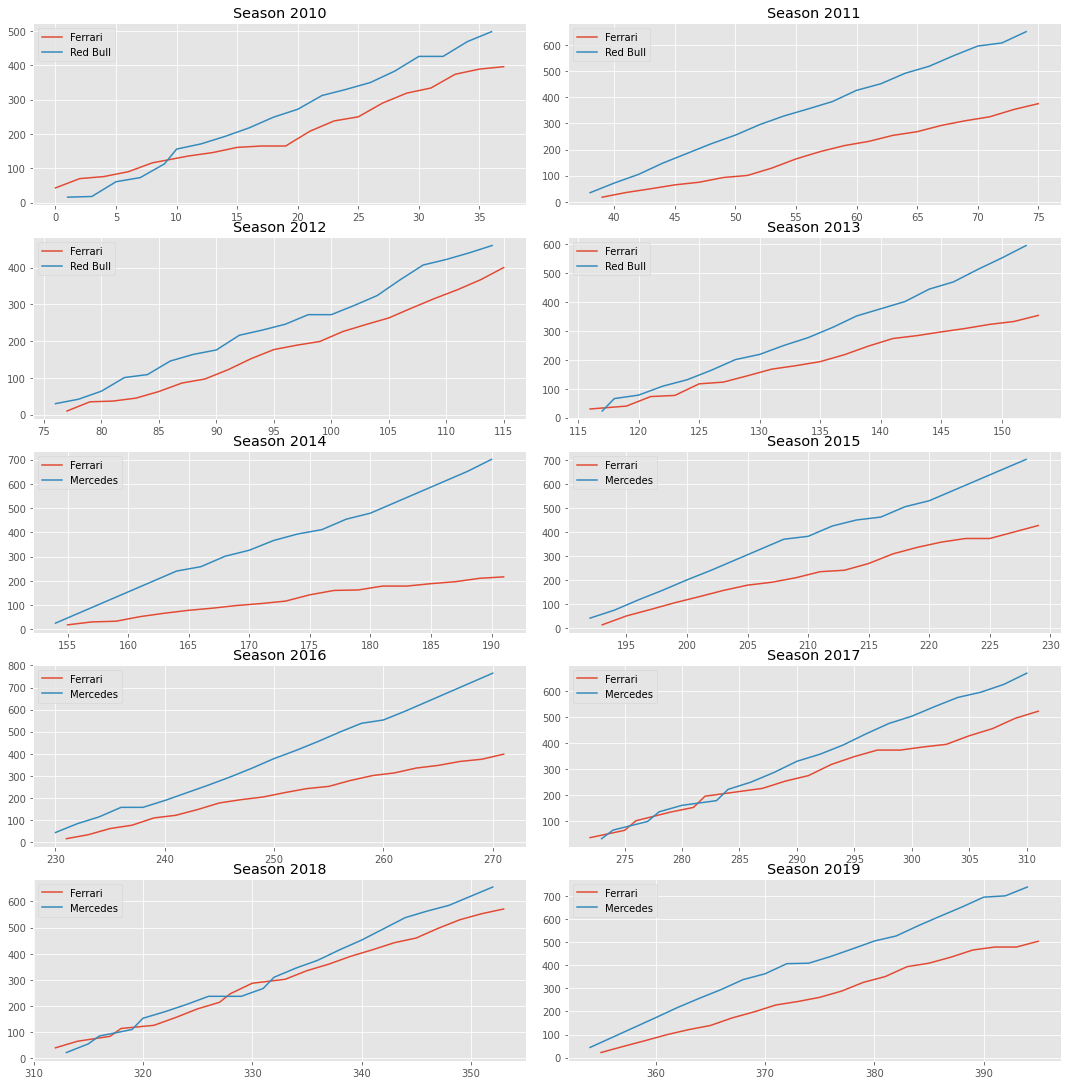

In [18]:
fig, ax = plt.subplots(figsize=(15,15), nrows=5, ncols=2)
fig.tight_layout()
years = result.year.unique()
for ind in range(0,len(years),2):
    ax_ind = ind//2
    result[result.year==years[ind]].groupby("name")["points"].plot(x="round", y="points", legend=True, ax=ax[ax_ind][0])
    result[result.year==years[ind+1]].groupby("name")["points"].plot(x="round", y="points", legend=True, ax=ax[ax_ind][1])
    
    ax[ax_ind][0].set_title(f"Season {years[ind]}")
    ax[ax_ind][1].set_title(f"Season {years[ind+1]}");

From the above graph we can observe season by season race performances of the Ferrari and a championship winning teams of the years.
<ul>
    <li>In every Formmula 1 season, teams introduce their cars in the season openig races and they develope them over a season. Hence, cars' performances usually improve, speeds increase, weights decrease, etc.</li>
    <li>Observing seasons 2011, 2013, 2014, 2015, 2016 Ferrari's gap with the title winner has increased significantly and consistantly over the season races.</li>
    <li>Whereas in the season 2012 Ferrari has been consistent with it's performance but never been able to catch-up with the title wining Red Bull Racing team.</li>
    <li>In season 2010, 2017, 2018 Ferrari was more competative, especially in 2018 where Ferrai was a major title competator, but did not able to hold on to their lead and their championship fight.</li>
    <li>Seasons 2013 - 2016 have been real nightmares for Ferrari.</li>
</ul>

In [ ]:
query_statement = """
                select races.year, constructors.name team, drivers.name driver, results.position, results.points from results
                
                join races
                    on races.raceId = results.raceId
                    
                join constructors
                    on constructors.constructorId = results.constructorId
                    
                join drivers
                    on drivers.driverId = results.driverId
                    
                join
                    (
                    
                        select last_race.year, constructors.name as seasonWinner from constructor_standings

                        join

                            (

                                select year, raceId from races
                                where year between 2010 and 2019
                                group by year
                                having max(round)

                            ) as last_race

                                on constructor_standings.raceId = last_race.raceId

                        join constructors
                            on constructors.constructorId = constructor_standings.constructorId

                        where constructor_standings.position=1

                    
                    ) as season_winner
                    
                    on season_winner.year = races.year
                    
                where races.year between 2010 and 2019 and (constructors.name = "Ferrari" or constructors.name = season_winner.seasonWinner)
            """
result = read_sql_query(query_statement, conn)

In [ ]:
def get_driver_contrib(ferrai, champ, year):
    ferrari_dictionary = (result[(result.year==year) & (result.team==ferrai)].groupby("driver").points.sum().div(result[(result.year==year) & (result.team==ferrai)].points.sum())).to_dict()
    champ_dictionary = (result[(result.year==year) & (result.team==champ)].groupby("driver").points.sum().div(result[(result.year==year) & (result.team==champ)].points.sum())).to_dict()

    
    ferrari_drivers = list(map(lambda val: val[0], sorted(ferrari_dictionary.items(), key=lambda val: val[1], reverse=True)))
    champ_drivers = list(map(lambda val: val[0], sorted(champ_dictionary.items(), key=lambda val: val[1], reverse=True)))
    drivers = ferrari_drivers+champ_drivers

    ferrari_drivers_contrib = list(map(lambda val: val[1], sorted(ferrari_dictionary.items(), key=lambda val: val[1], reverse=True)))
    champ_drivers_contrib = list(map(lambda val: val[1], sorted(champ_dictionary.items(), key=lambda val: val[1], reverse=True)))
    contrib = ferrari_drivers_contrib+champ_drivers_contrib
    
    return drivers, contrib

In [ ]:
fig, ax = plt.subplots(figsize=(17,17), nrows=5, ncols=2, sharey=True)
fig.tight_layout(pad=5)
years = result.year.unique()
for ind in range(0,len(years),2):
    ax_ind = ind//2
    
    for add in range(2):

        year = years[ind+add]
        
        t1, t2 = result[result.year==year].team.unique()
        
        if t1 == "Ferrari":
            
            drivers, contrib = get_driver_contrib(t1, t2, year)
            
            red_patch = mpatches.Patch(color='tab:red', label=t1)
            blue_patch = mpatches.Patch(color='tab:blue', label=t2)
            
        else:
            
            drivers, contrib = get_driver_contrib(t2, t1, year)
                
            red_patch = mpatches.Patch(color='tab:red', label=t2)
            blue_patch = mpatches.Patch(color='tab:blue', label=t1)
            
        ax[ax_ind][add].bar(drivers, contrib, color=['tab:red','tab:red','tab:blue','tab:blue'])
        ax[ax_ind][add].set_title(f"Season {years[ind+add]}")
        
        ax[ax_ind][add].legend(handles=[red_patch, blue_patch])
        
    ax[ax_ind][0].set_ylabel("Percentage of teams'\ntotal points distributed\nover drivers");

The above plot shows drivers' contribution in the teams total points season by season. By using percentage of total team points scored by the drivers we can compare Ferrai drivers' and championship winning teams' drivers' contribution in team, season by season.
<ul>
    <li>From 2010 to 2015 Ferrai clearly had a dominant lead driver in their line up, Fernando Alonso (2010-2014), Sebastian Vettel (2015). In every season of this period dominant lead driver scored atleast 60% of the team's total points.</li>
    <li>Wheras that dynamics changed for Ferrari from 2016 where second driver scored atleast close to 40% of the team's total points.</li>
    <li>Season 2019 showed shift of power in the Ferrari where Sebastian Vettel (4 times drivers' championship winner) is no longer the lead driver.</li>
    <li>Since, 2010 except 2018 and 2019 the Ferrari's drivers' contribution gap is always greater than those of the championship winning team's drivers' contribution gap.</li>
</ul>

In [19]:
query_statement = """
                select races.year, constructors.name,
                
                    (
                        case
                            when results.position<=3 then "Podium"
                            when results.position between 4 and 10 then "In points"
                            else
                                case
                                    when status.status like "Finish%" or status.status like "+%" then "Out of points"
                                    else "DNF"
                                end 
                        end
                    ) as "resultType"
                
                from results
                
                join races
                    on races.raceId = results.raceId
                    
                join constructors
                    on constructors.constructorId = results.constructorId
                    
                join status
                    on results.statusId = status.statusId
                    
                join
                
                    (
                    
                        select last_race.year, constructors.name as seasonWinner from constructor_standings

                        join

                            (

                                select year, raceId from races
                                where year between 2010 and 2019
                                group by year
                                having max(round)

                            ) as last_race

                                on constructor_standings.raceId = last_race.raceId

                        join constructors
                            on constructors.constructorId = constructor_standings.constructorId

                        where constructor_standings.position=1

                    
                    ) as season_winner
                    
                on season_winner.year = races.year
                
                where constructors.name = "Ferrari" or constructors.name = season_winner.seasonWinner
            """
result = read_sql_query(query_statement, conn)

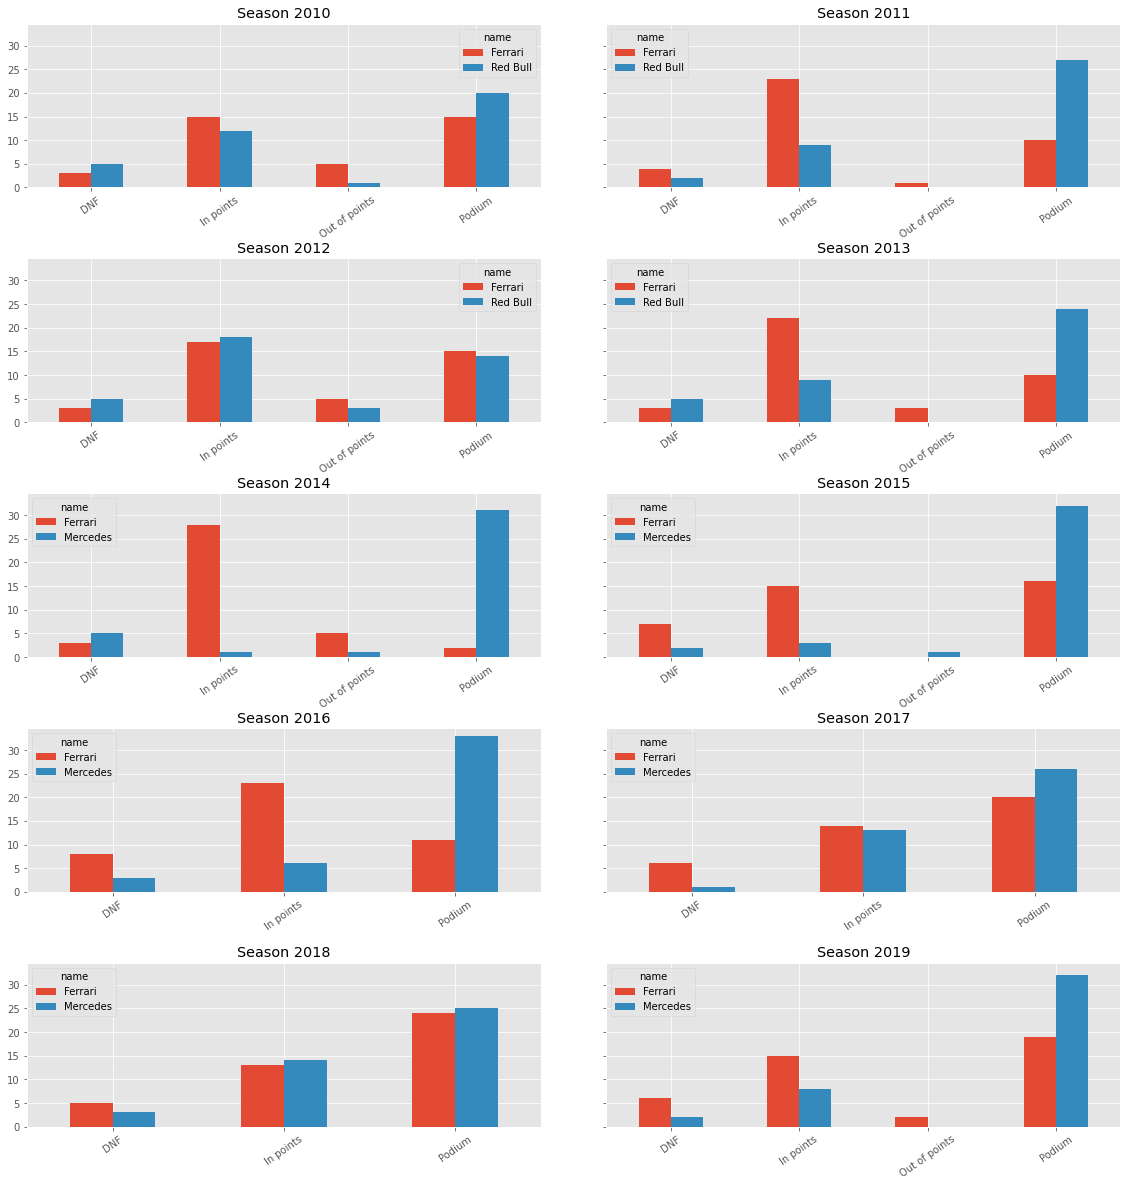

In [20]:
fig, ax = plt.subplots(figsize=(17,17), nrows=5, ncols=2, sharey=True)
fig.tight_layout(pad=5)
years = result.year.unique()
for ind in range(0,len(years),2):
    ax_ind = ind//2
    
    for add in range(2):
        year = years[ind+add]
        df = result[result.year==year].groupby("name").resultType.value_counts().to_frame()
        name = []
        resultType = []
        for team, cat in df.index:
            name.append(team)
            resultType.append(cat)
        df.index = range(df.shape[0])
        df.rename(columns={"resultType":"Counts"}, inplace=True)
        df["name"] = name
        df["resultType"] = resultType
        df.pivot(index='resultType', columns='name', values='Counts').plot(kind='bar', ax=ax[ax_ind][add], rot=35, xlabel="")
        ax[ax_ind][add].set_title(f"Season {years[ind+add]}");

Above plots give clear season by season performance comparison over the last decade between Ferrari and the championship title winning team.
Note:
<ul>
    <li>DNF: Did Not Finished</li>
    <li>In points: Final standings between 4 - 10 (both inclusive)</li>
    <li>Podiums: Final standings betweern 1 - 3 (both inclusive)</li>
</ul>

Findings:
<ul>
    <li>Season 2012 is an outlier season in terms of the number of podiums scored by Ferrari compare to the title winning team. Except 2012 in every other season the championship wining team has been able to score more podiums than Ferrai. But in 2018 Ferrari scored almost equal number of podiums as the title winning Mercedes team.</li>
    <li>Except 2012 and 2018, in every season over the last decade Ferrari placed their cars into the points (in the top 10 rankings in a race) more than champion teams but has failed to clinch more podium spots than the champion teams.</li>
    <li>Surprisingly, three out of the four seasons (2010-2013) the championship winning team Red Bull has more DNFs than Ferrari.</li>
    <li>Opposite to that, in every season since 2015 Ferrari has atleast 5 DNFs whereas the title winning Mercedes never has had 5 DNFs in a season. Consequently, in every season since 2015 Ferrari has more DNFs than the Mercedes.</li>
</ul>
The obvious question arises that what are all those DNF types?

In [21]:
query_statement = """
                select 
                
                    (

                        case
                            when races.year<2015 then "2010-2014"
                            else "2015-2019"
                        end

                    ) as "yearPartition",
                
                    (

                        case
                            when status.status like "Finish%" or status.status like "+%" then "Completed"
                            else status.status
                        end

                    ) as resultType
                
                from results
                
                join races
                    on races.raceId = results.raceId
                    
                join constructors
                    on constructors.constructorId = results.constructorId
                    
                join status
                    on status.statusId = results.statusId
                    
                where races.year between 2010 and 2019 and constructors.name = "Ferrari"
                
            """
result = read_sql_query(query_statement, conn)

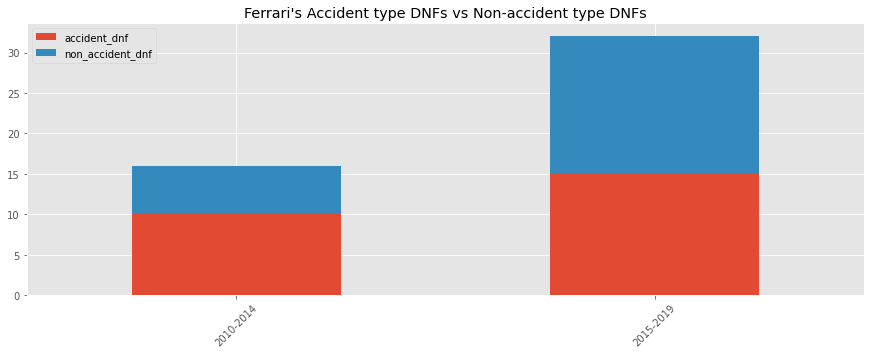

In [22]:
df = result[result.resultType!="Completed"].groupby("yearPartition").resultType.value_counts(sort=True, ascending=True).to_frame()
yearPartition = []
resultType = []
for year, cat in df.index:
    yearPartition.append(year)
    resultType.append(cat)
df.index = range(df.shape[0])
df.rename(columns={"resultType":"Counts"}, inplace=True)
df["yearPartition"] = yearPartition
df["resultType"] = resultType
#df.pivot(index='resultType', columns='yearPartition', values='Counts').plot(kind='barh');

df.resultType = df.resultType.apply(lambda val: "Accident" if val=="Accident" or val=="Collision" or val=="Collision damage" else val)


accident_dnf = [df[(df.yearPartition=="2010-2014") & (df.resultType=="Accident")].Counts.sum(),df[(df.yearPartition=="2015-2019") & (df.resultType=="Accident")].Counts.sum()]
non_accident_dnf = [df[(df.yearPartition=="2010-2014") & (df.resultType!="Accident")].Counts.sum(), df[(df.yearPartition=="2015-2019") & (df.resultType!="Accident")].Counts.sum()]

df = pd.DataFrame({"accident_dnf":accident_dnf, "non_accident_dnf":non_accident_dnf, "years":["2010-2014", "2015-2019"]})

fig, ax = plt.subplots(figsize=(15,5))
df[["accident_dnf","non_accident_dnf"]].plot(kind="bar", stacked=True, ax=ax)
ax.set_xticks(range(len(df.years.values.tolist())))
ax.set_xticklabels(df.years.values.tolist(), rotation=45)
ax.set_title("Ferrari's Accident type DNFs vs Non-accident type DNFs");

<ul>
    <li>As we knew from the last set of plots that there were more DNFs in the period 2015-2019 than the period 2010-2014.</li>
    <li>But significant rise in the non accident related DNFs (such as power loss, gear box issue, etc.) is evident in the above plot.</li>
    <li>In the 2010-2014 period 37.5% of the total 16 DNFs were non accident related. This is compared to 53.125% of total 32 DNFs were non accident related in the period 2015-2019</li>
</ul>
Unfortunately we do not have cars' internal data at our disposal for the further analysis. But, in general the above findings is an alarming sign for any Formula 1 team as the realiability is always top priority.<br>
Let's conduct some hypothesis tests now.